**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


Grupo:
Integrantes

1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

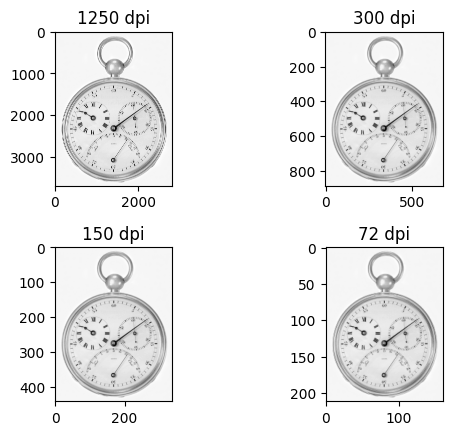

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def reamostragem(img, old_dpi, new_dpi):
    """
        Realiza o processo de reamostragem da imagem passada, reamostrand de old_dpi para new_dpi.
        
        Args:
            img (np.ndarray): A imagem que será reamostrada.
            old_dpi (int): O dpi da imagem.
            new_dpi (int): O dpi desejado.
            
        Returns:
            Numpy.ndarray, representando a nova imagem.
    """
    
    altura = img.shape[0]
    largura = img.shape[1]
    
    proporcao = new_dpi / old_dpi # Proporção do dpi da nova imagem em relação à original.
    
    nova_altura = int(altura * proporcao) 
    nova_largura = int(largura * proporcao)
    #Tamanho da nova imagem
    
    pixels_por_pixel = altura / nova_altura 
    # Indica a quantidade de pixels da imagem antiga que devem ser condensados em um único pixel da nova imagem.
    # Valor serve tanto para altura como para largura

    nova_img = np.zeros((nova_altura, nova_largura))

    altura_atual = 0
    for i in range(0,nova_altura):
        largura_atual = 0
        for j in range(0, nova_largura):
            # (i,j) é o novo pixel
            
            altura_limite = int(altura_atual + pixels_por_pixel)
            largura_limite = int(largura_atual + pixels_por_pixel)
            
            nova_img[i,j] = np.sum(img[int(altura_atual):altura_limite, int(largura_atual):largura_limite])
            
            num_pixels = (altura_limite - int(altura_atual)) * (largura_limite - int(largura_atual))
            nova_img[i,j] = int( nova_img[i,j] / num_pixels)
            
            largura_atual += pixels_por_pixel
        altura_atual += pixels_por_pixel
        
    return nova_img

if __name__ == "__main__":
    img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)
    # img is a numpy.ndarray

    #print('Tamanho da imagem : ',img.shape)

    # Original
    plt.subplot(2,2,1)
    plt.subplots_adjust(hspace=0.4)
    
    plt.title('1250 dpi')
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

    # 300 dpi
    plt.subplot(2,2,2)
    plt.title('300 dpi')       
    img_300 = reamostragem(img,1250,300)        
    plt.imshow(img_300, cmap='gray', vmin=0, vmax=255)
    
    # 150 dpi
    plt.subplot(2,2,3)
    plt.title('150 dpi')        
    img_150 = reamostragem(img,1250,150)        
    plt.imshow(img_150, cmap='gray', vmin=0, vmax=255)
    
    # 72 dpi
    plt.subplot(2,2,4)
    plt.title('72 dpi')        
    img_72 = reamostragem(img,1250,72)        
    plt.imshow(img_72, cmap='gray', vmin=0, vmax=255)
    


2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

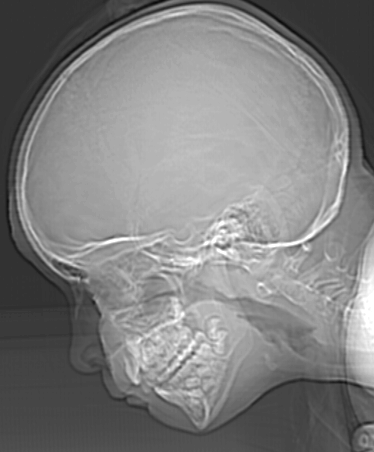

Imagem quantizada com 7 bits


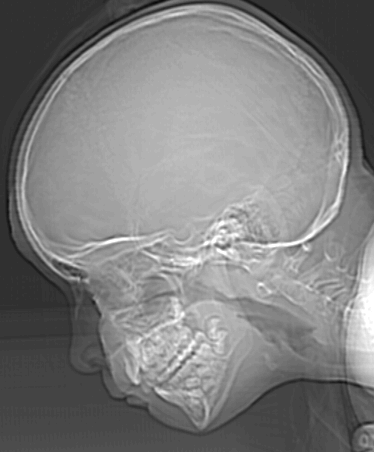

Imagem quantizada com 6 bits


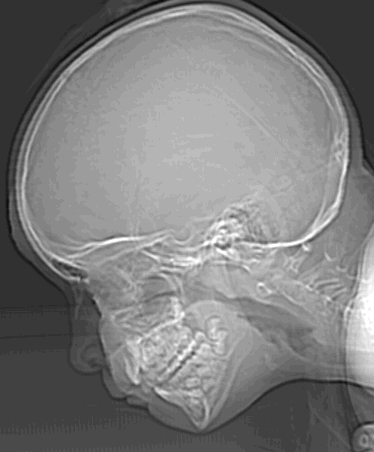

Imagem quantizada com 5 bits


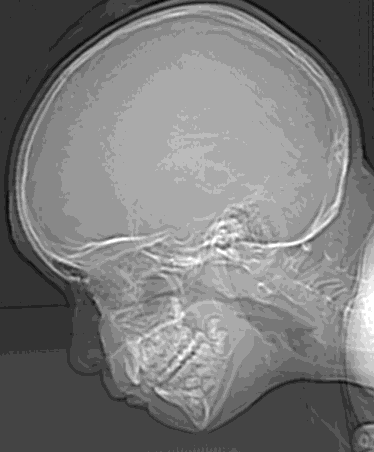

Imagem quantizada com 4 bits


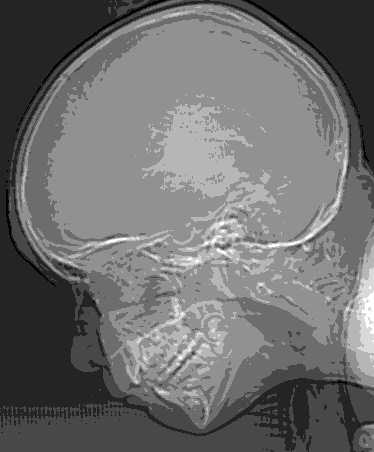

Imagem quantizada com 3 bits


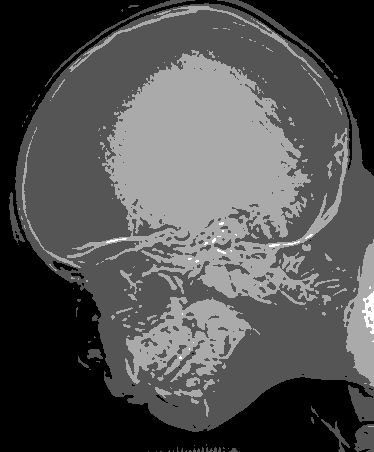

Imagem quantizada com 2 bits


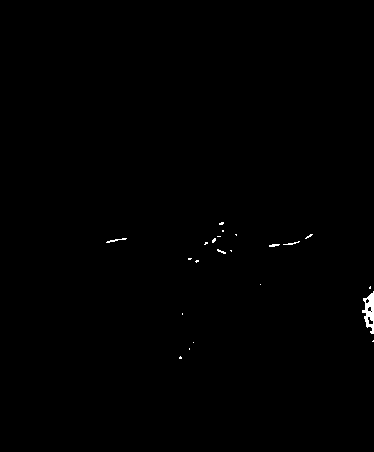

Imagem quantizada com 1 bits


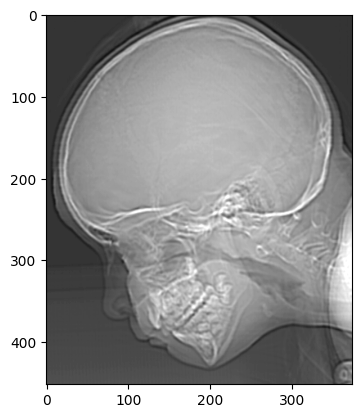

In [5]:
import cv2
import numpy as np
from PIL import Image

image = cv2.imread("./ctskull-256.tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)


def quantize_image(image, bits):
    normalized_image = image / 255.0 # Image normalization. All pixel values are now in the [0,1] range
    
    levels = 2 ** bits # The number of levels the image needs to have.
    
    quantized_image = np.floor(normalized_image * levels) / (levels - 1)
    # normalized_image * levels --> This scales all the normalized values to the range [0,levels)
    # np.floor( ... ) --> This discretize the values in the [0,levels) range
    # ... / (levels - 1) --> Returns the values to the [0,1] range.

    quantized_image = np.uint8(quantized_image * 255)
    # Returns the values to the [0,255] range.
    
    return quantized_image

quantized_images = {}



for bits in range(7, 0, -1):
    quantized_images[bits] = quantize_image(image, bits)

for bits in range(7, 0, -1):
    pil_image = Image.fromarray(quantized_images[bits])
    display(pil_image)
    print(f'Imagem quantizada com {bits} bits')
